<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/improvement_Lucia2/ICaRLMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [1]:
import os
import logging
import sys

In [2]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone -b improvement_Lucia2 https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 150, done.
remote: Counting objects: 100% (150/150), done.
remote: Compressing objects: 100% (150/150), done.
remote: Total 1724 (delta 88), reused 0 (delta 0), pack-reused 1574
Receiving objects: 100% (1724/1724), 2.20 MiB | 742.00 KiB/s, done.
Resolving deltas: 100% (1096/1096), done.


# Import packages

In [3]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR.data_set import Subset
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from DatasetCIFAR import ICaRLModel
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import random
random.seed(params.SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(params.SEED)
print(params.NUM_WORKERS)

653
4


# Define Datasets

In [5]:
train_transformer = transforms.Compose([transforms.RandomCrop(size = 32, padding=4),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transformer = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
trainDS = Dataset(train=True)
testDS = Dataset(train=False)

Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [7]:
train_splits = trainDS.splits
test_splits = testDS.splits

# Define Network

In [8]:
ICaRL = ResNet.resnet32(num_classes=100)
ICaRL =  ICaRL.to(params.DEVICE)

In [9]:
exemplars = [None]*100

test_indexes =  []
accs = []

At step  0  and at epoch =  0  the loss is =  0.03364010155200958  and accuracy is =  0.1588
At step  0  and at epoch =  1  the loss is =  0.033587899059057236  and accuracy is =  0.349
At step  0  and at epoch =  2  the loss is =  0.020905598998069763  and accuracy is =  0.4794
At step  0  and at epoch =  3  the loss is =  0.014216865412890911  and accuracy is =  0.543
At step  0  and at epoch =  4  the loss is =  0.011078710667788982  and accuracy is =  0.5914
At step  0  and at epoch =  5  the loss is =  0.022685445845127106  and accuracy is =  0.6192
At step  0  and at epoch =  6  the loss is =  0.01937151327729225  and accuracy is =  0.638
At step  0  and at epoch =  7  the loss is =  0.020210005342960358  and accuracy is =  0.6746
At step  0  and at epoch =  8  the loss is =  0.017571579664945602  and accuracy is =  0.6622
At step  0  and at epoch =  9  the loss is =  0.02171386405825615  and accuracy is =  0.71
At step  0  and at epoch =  10  the loss is =  0.014421495608985424 

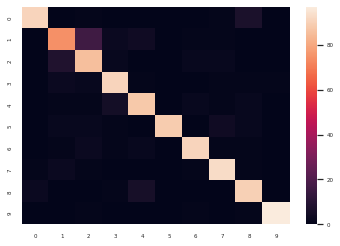

At step  10  and at epoch =  0  the loss is =  0.030563462525606155  and accuracy is =  0.2935714285714286
At step  10  and at epoch =  1  the loss is =  0.02839851751923561  and accuracy is =  0.38557142857142856
At step  10  and at epoch =  2  the loss is =  0.027798740193247795  and accuracy is =  0.4667142857142857
At step  10  and at epoch =  3  the loss is =  0.024307535961270332  and accuracy is =  0.5291428571428571
At step  10  and at epoch =  4  the loss is =  0.02436373382806778  and accuracy is =  0.5654285714285714
At step  10  and at epoch =  5  the loss is =  0.023604175075888634  and accuracy is =  0.5992857142857143
At step  10  and at epoch =  6  the loss is =  0.024663414806127548  and accuracy is =  0.6234285714285714
At step  10  and at epoch =  7  the loss is =  0.023106692358851433  and accuracy is =  0.6458571428571429
At step  10  and at epoch =  8  the loss is =  0.020869998261332512  and accuracy is =  0.6617142857142857
At step  10  and at epoch =  9  the lo

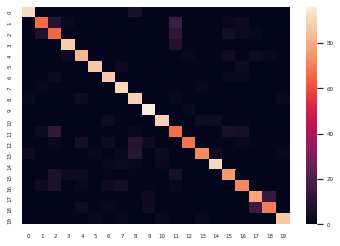

At step  20  and at epoch =  0  the loss is =  0.03530837595462799  and accuracy is =  0.3495
At step  20  and at epoch =  1  the loss is =  0.03254513069987297  and accuracy is =  0.41175
At step  20  and at epoch =  2  the loss is =  0.029761575162410736  and accuracy is =  0.49025
At step  20  and at epoch =  3  the loss is =  0.030520444735884666  and accuracy is =  0.5435
At step  20  and at epoch =  4  the loss is =  0.03220035135746002  and accuracy is =  0.5765
At step  20  and at epoch =  5  the loss is =  0.03428512066602707  and accuracy is =  0.603
At step  20  and at epoch =  6  the loss is =  0.02876703254878521  and accuracy is =  0.632125
At step  20  and at epoch =  7  the loss is =  0.027374161407351494  and accuracy is =  0.651125
At step  20  and at epoch =  8  the loss is =  0.027278553694486618  and accuracy is =  0.665375
At step  20  and at epoch =  9  the loss is =  0.03167557343840599  and accuracy is =  0.681625
At step  20  and at epoch =  10  the loss is = 

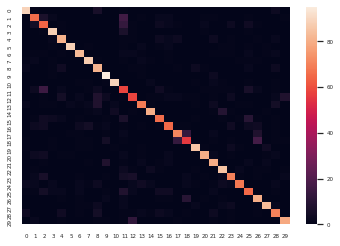

At step  30  and at epoch =  0  the loss is =  0.040889520198106766  and accuracy is =  0.3958477508650519
At step  30  and at epoch =  1  the loss is =  0.04249314218759537  and accuracy is =  0.47139561707035754
At step  30  and at epoch =  2  the loss is =  0.0399496853351593  and accuracy is =  0.542560553633218
At step  30  and at epoch =  3  the loss is =  0.03648645803332329  and accuracy is =  0.5694348327566321
At step  30  and at epoch =  4  the loss is =  0.033575911074876785  and accuracy is =  0.5993079584775086
At step  30  and at epoch =  5  the loss is =  0.03394066169857979  and accuracy is =  0.6179930795847751
At step  30  and at epoch =  6  the loss is =  0.03505949676036835  and accuracy is =  0.6342560553633217
At step  30  and at epoch =  7  the loss is =  0.0382717065513134  and accuracy is =  0.6415224913494809
At step  30  and at epoch =  8  the loss is =  0.03809073567390442  and accuracy is =  0.654325259515571
At step  30  and at epoch =  9  the loss is =  

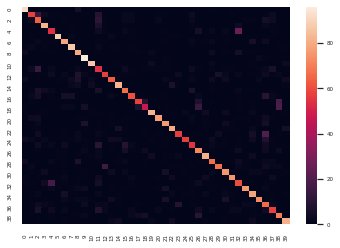

At step  40  and at epoch =  0  the loss is =  0.04406003654003143  and accuracy is =  0.40458015267175573
At step  40  and at epoch =  1  the loss is =  0.052818961441516876  and accuracy is =  0.43598691384950927
At step  40  and at epoch =  2  the loss is =  0.04554988443851471  and accuracy is =  0.4835332606324973
At step  40  and at epoch =  3  the loss is =  0.041941557079553604  and accuracy is =  0.5190839694656488
At step  40  and at epoch =  4  the loss is =  0.04460242763161659  and accuracy is =  0.5367502726281352
At step  40  and at epoch =  5  the loss is =  0.04912680387496948  and accuracy is =  0.5525627044711015
At step  40  and at epoch =  6  the loss is =  0.042268410325050354  and accuracy is =  0.580370774263904
At step  40  and at epoch =  7  the loss is =  0.03784191608428955  and accuracy is =  0.5856052344601963
At step  40  and at epoch =  8  the loss is =  0.04361666738986969  and accuracy is =  0.6013086150490731
At step  40  and at epoch =  9  the loss i

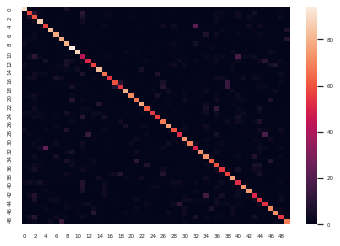

At step  50  and at epoch =  0  the loss is =  0.05051273852586746  and accuracy is =  0.4240334378265413
At step  50  and at epoch =  1  the loss is =  0.054981715977191925  and accuracy is =  0.47826541274817136
At step  50  and at epoch =  2  the loss is =  0.05579419061541557  and accuracy is =  0.5155694879832811
At step  50  and at epoch =  3  the loss is =  0.05115609988570213  and accuracy is =  0.5403343782654128
At step  50  and at epoch =  4  the loss is =  0.048242777585983276  and accuracy is =  0.5636363636363636
At step  50  and at epoch =  5  the loss is =  0.04724421352148056  and accuracy is =  0.5853709508881922
At step  50  and at epoch =  6  the loss is =  0.04743902012705803  and accuracy is =  0.5878787878787879
At step  50  and at epoch =  7  the loss is =  0.05182919651269913  and accuracy is =  0.6020898641588297
At step  50  and at epoch =  8  the loss is =  0.0462958961725235  and accuracy is =  0.622466039707419
At step  50  and at epoch =  9  the loss is =

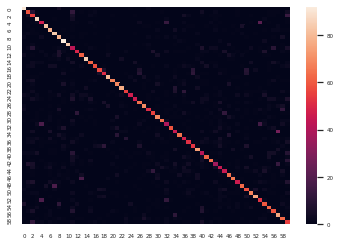

At step  60  and at epoch =  0  the loss is =  0.05677218362689018  and accuracy is =  0.4177777777777778
At step  60  and at epoch =  1  the loss is =  0.0605681873857975  and accuracy is =  0.46545454545454545
At step  60  and at epoch =  2  the loss is =  0.0550994798541069  and accuracy is =  0.5013131313131313
At step  60  and at epoch =  3  the loss is =  0.058967169374227524  and accuracy is =  0.5219191919191919
At step  60  and at epoch =  4  the loss is =  0.05778615549206734  and accuracy is =  0.547979797979798
At step  60  and at epoch =  5  the loss is =  0.057293206453323364  and accuracy is =  0.5548484848484848
At step  60  and at epoch =  6  the loss is =  0.05734318122267723  and accuracy is =  0.5726262626262626
At step  60  and at epoch =  7  the loss is =  0.059172600507736206  and accuracy is =  0.5784848484848485
At step  60  and at epoch =  8  the loss is =  0.05556999146938324  and accuracy is =  0.5909090909090909
At step  60  and at epoch =  9  the loss is =

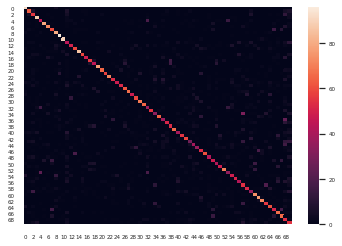

At step  70  and at epoch =  0  the loss is =  0.06504695862531662  and accuracy is =  0.42894995093228655
At step  70  and at epoch =  1  the loss is =  0.06042324751615524  and accuracy is =  0.5148184494602551
At step  70  and at epoch =  2  the loss is =  0.0586308054625988  and accuracy is =  0.5527968596663395
At step  70  and at epoch =  3  the loss is =  0.06313804537057877  and accuracy is =  0.582531894013739
At step  70  and at epoch =  4  the loss is =  0.05804988369345665  and accuracy is =  0.6114818449460255
At step  70  and at epoch =  5  the loss is =  0.05986989662051201  and accuracy is =  0.6276741903827282
At step  70  and at epoch =  6  the loss is =  0.06453952193260193  and accuracy is =  0.6422963689892051
At step  70  and at epoch =  7  the loss is =  0.052441906183958054  and accuracy is =  0.6477919528949951
At step  70  and at epoch =  8  the loss is =  0.05866334214806557  and accuracy is =  0.6549558390578999
At step  70  and at epoch =  9  the loss is = 

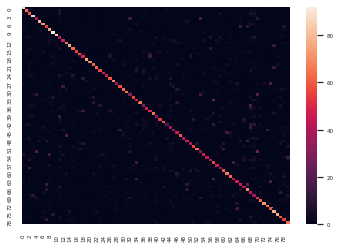

At step  80  and at epoch =  0  the loss is =  0.07328721135854721  and accuracy is =  0.4253831417624521
At step  80  and at epoch =  1  the loss is =  0.07152435183525085  and accuracy is =  0.4874521072796935
At step  80  and at epoch =  2  the loss is =  0.0750768855214119  and accuracy is =  0.521551724137931
At step  80  and at epoch =  3  the loss is =  0.07176433503627777  and accuracy is =  0.54272030651341
At step  80  and at epoch =  4  the loss is =  0.07526594400405884  and accuracy is =  0.5646551724137931
At step  80  and at epoch =  5  the loss is =  0.06681686639785767  and accuracy is =  0.578735632183908
At step  80  and at epoch =  6  the loss is =  0.06677520275115967  and accuracy is =  0.5884099616858237
At step  80  and at epoch =  7  the loss is =  0.06750642508268356  and accuracy is =  0.6030651340996168
At step  80  and at epoch =  8  the loss is =  0.06458910554647446  and accuracy is =  0.6079501915708813
At step  80  and at epoch =  9  the loss is =  0.06

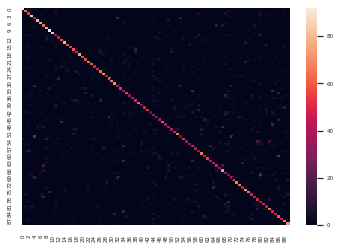

At step  90  and at epoch =  0  the loss is =  0.08535147458314896  and accuracy is =  0.4227954971857411
At step  90  and at epoch =  1  the loss is =  0.08231018483638763  and accuracy is =  0.4950281425891182
At step  90  and at epoch =  2  the loss is =  0.07341602444648743  and accuracy is =  0.5393996247654784
At step  90  and at epoch =  3  the loss is =  0.07298402488231659  and accuracy is =  0.5551594746716698
At step  90  and at epoch =  4  the loss is =  0.07149110734462738  and accuracy is =  0.5766416510318949
At step  90  and at epoch =  5  the loss is =  0.07245880365371704  and accuracy is =  0.5857410881801126
At step  90  and at epoch =  6  the loss is =  0.07513263821601868  and accuracy is =  0.5964352720450281
At step  90  and at epoch =  7  the loss is =  0.06918898969888687  and accuracy is =  0.6058161350844278
At step  90  and at epoch =  8  the loss is =  0.06966813653707504  and accuracy is =  0.6136960600375234
At step  90  and at epoch =  9  the loss is = 

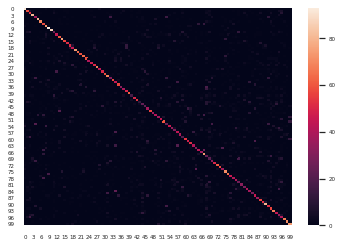

In [10]:
for task in range(0, 100, params.TASK_SIZE):
  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes, transform = train_transformer)
  test_dataset = Subset(testDS, test_indexes, transform = test_transformer)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE, shuffle=True)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE , shuffle=True )
  
  ICaRL, exemplars = ICaRLModel.incrementalTrain(task, trainDS, ICaRL, exemplars, train_transformer)

  col = []
  for i,x in enumerate( train_splits[ :int(task/10) + 1]) : 
    v = np.array(x)
    col = np.concatenate( (col,v), axis = None)
    col = col.astype(int)
  mean = None
  total = 0.0
  running_corrects = 0.0
  for img, lbl, _ in train_loader:
      img = img.float().to(params.DEVICE)
      preds, mean = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'train accuracy = {accuracy}')
  accs.append(accuracy)

  total = 0.0
  running_corrects = 0.0
  tot_preds = []
  tot_lab = []
  for img, lbl, _ in test_loader:
      img = img.float().to(params.DEVICE)
      preds, _ = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      tot_preds = np.concatenate( ( tot_preds, preds.data.cpu().numpy() ) )
      tot_lab = np.concatenate( (tot_lab, labels.data.cpu().numpy()  ) )

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'test accuracy = {accuracy}')
  cf = confusion_matrix(tot_lab, tot_preds)
  df_cm = pd.DataFrame(cf, range(task + params.TASK_SIZE), range(task + params.TASK_SIZE))
  sn.set(font_scale = .5) # for label size
  sn.heatmap(df_cm, annot=False)
  plt.show()

In [11]:
accs = [.897,.80,.76,.69,.64,.58,.54,.52,.48,.46]

In [12]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
def plotTask(pars_tasks):

  x_tasks =  np.linspace(10, 100, 10)

  plt.plot(x_tasks, pars_tasks, label=['Accuracy'])
  plt.xlabel("Epoch")
  plt.ylim(0,1)
  plt.title('Accuracy over tasks')
  plt.legend(['Accuracy'])
  plt.grid(True)
  plt.show()

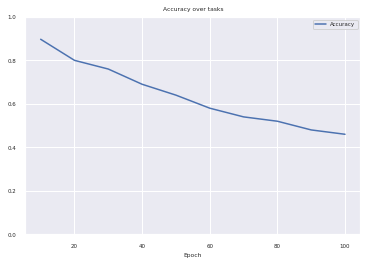

In [13]:
plotTask(accs)

In [14]:
np.diagonal(cf)

array([92, 58, 53, 81, 37, 80, 70, 58, 72, 93, 87, 26, 45, 60, 76, 57, 51,
       51, 45, 74, 64, 59, 64, 59, 41, 47, 51, 68, 44, 50, 59, 69, 30, 57,
       45, 57, 32, 39, 50, 62, 17, 50, 54, 12, 24, 23, 38, 57, 38, 41, 38,
       45, 60, 26, 46, 35, 30, 44, 40, 20, 54, 48, 52, 41, 30, 43, 36, 74,
       25, 22, 33, 50, 61, 58, 37, 71, 65, 46, 41, 41, 27, 32, 29, 41, 38,
       29, 46, 37, 57, 53, 80, 52, 57, 68, 45, 36, 41, 67, 71, 74])

In [15]:
true = np.sum(cf, axis=1)
true

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100])

In [16]:
pred = np.sum(cf, axis=0)
pred

array([137, 111, 174, 137, 101,  98, 113, 124, 142, 146,  99,  98,  78,
       125, 100, 104,  74,  81, 104,  96,  79,  99,  85, 101,  54,  69,
        96, 104,  78,  72,  84, 132,  83,  76, 149,  85,  66,  66,  99,
        85,  64,  78,  97,  62, 141,  70, 100,  73,  75,  83, 104,  93,
        88,  96, 118,  63,  86, 123,  82, 109, 101,  94,  99,  65,  85,
        80,  80, 130, 178, 141, 102,  90,  80,  81,  93, 121,  92, 124,
        96,  95, 124,  51,  92,  72, 102,  47, 102,  84, 131, 100, 119,
       144, 169, 103, 106, 138, 158, 102, 103, 117])

In [17]:
pred = np.array([137,  98, 142, 112,  39,  82, 116,  96, 145, 112,  84, 110,  59,
        96,  73,  78,  50,  91,  98,  92,  64, 109,  91,  72,  38,  70,
        76,  81,  89, 102,  81, 116,  72,  59, 177,  59,  62,  63,  93,
        90,  72,  79, 102,  52, 162,  68,  67,  80,  65,  98,  80,  65,
        84,  96, 121,  53,  77, 136,  69, 103,  76,  94, 109,  79, 126,
        61, 126, 106, 182,  68, 122,  94,  90,  80,  80, 159,  98, 132,
       145,  88, 170,  77,  79,  78, 131,  74, 149,  70, 149, 114, 102,
       172, 212, 134, 124, 187, 189, 114, 126, 131])

In [18]:
i = 0
for el, name in zip(pred,trainDS.__getClassesNames__()) :
  print('classe', i, 'name', name, ',preds', el)
  i+=1

classe 0 name apple ,preds 137
classe 1 name aquarium_fish ,preds 98
classe 2 name baby ,preds 142
classe 3 name bear ,preds 112
classe 4 name beaver ,preds 39
classe 5 name bed ,preds 82
classe 6 name bee ,preds 116
classe 7 name beetle ,preds 96
classe 8 name bicycle ,preds 145
classe 9 name bottle ,preds 112
classe 10 name bowl ,preds 84
classe 11 name boy ,preds 110
classe 12 name bridge ,preds 59
classe 13 name bus ,preds 96
classe 14 name butterfly ,preds 73
classe 15 name camel ,preds 78
classe 16 name can ,preds 50
classe 17 name castle ,preds 91
classe 18 name caterpillar ,preds 98
classe 19 name cattle ,preds 92
classe 20 name chair ,preds 64
classe 21 name chimpanzee ,preds 109
classe 22 name clock ,preds 91
classe 23 name cloud ,preds 72
classe 24 name cockroach ,preds 38
classe 25 name couch ,preds 70
classe 26 name crab ,preds 76
classe 27 name crocodile ,preds 81
classe 28 name cup ,preds 89
classe 29 name dinosaur ,preds 102
classe 30 name dolphin ,preds 81
classe 31 na

In [19]:
train_splits

[[94.0, 63.0, 74.0, 21.0, 35.0, 56.0, 91.0, 96.0, 87.0, 48.0],
 [68.0, 80.0, 22.0, 37.0, 60.0, 97.0, 51.0, 62.0, 92.0, 76.0],
 [75.0, 89.0, 23.0, 99.0, 39.0, 66.0, 54.0, 69.0, 84.0, 61.0],
 [85.0, 24.0, 98.0, 41.0, 73.0, 58.0, 78.0, 77.0, 70.0, 49.0],
 [65.0, 88.0, 36.0, 93.0, 45.0, 10.0, 90.0, 17.0, 32.0, 59.0],
 [83.0, 43.0, 53.0, 11.0, 86.0, 19.0, 38.0, 30.0, 40.0, 50.0],
 [57.0, 81.0, 12.0, 95.0, 25.0, 47.0, 34.0, 52.0, 44.0, 72.0],
 [46.0, 79.0, 20.0, 28.0, 5.0, 71.0, 8.0, 18.0, 33.0, 15.0],
 [55.0, 29.0, 64.0, 31.0, 67.0, 7.0, 13.0, 14.0, 42.0, 6.0],
 [82.0, 2.0, 27.0, 16.0, 26.0, 3.0, 4.0, 1.0, 9.0, 0.0]]

In [20]:
trainDS.__getClassesNames__()

['apple',
 'aquarium_fish',
 'baby',
 'bear',
 'beaver',
 'bed',
 'bee',
 'beetle',
 'bicycle',
 'bottle',
 'bowl',
 'boy',
 'bridge',
 'bus',
 'butterfly',
 'camel',
 'can',
 'castle',
 'caterpillar',
 'cattle',
 'chair',
 'chimpanzee',
 'clock',
 'cloud',
 'cockroach',
 'couch',
 'crab',
 'crocodile',
 'cup',
 'dinosaur',
 'dolphin',
 'elephant',
 'flatfish',
 'forest',
 'fox',
 'girl',
 'hamster',
 'house',
 'kangaroo',
 'keyboard',
 'lamp',
 'lawn_mower',
 'leopard',
 'lion',
 'lizard',
 'lobster',
 'man',
 'maple_tree',
 'motorcycle',
 'mountain',
 'mouse',
 'mushroom',
 'oak_tree',
 'orange',
 'orchid',
 'otter',
 'palm_tree',
 'pear',
 'pickup_truck',
 'pine_tree',
 'plain',
 'plate',
 'poppy',
 'porcupine',
 'possum',
 'rabbit',
 'raccoon',
 'ray',
 'road',
 'rocket',
 'rose',
 'sea',
 'seal',
 'shark',
 'shrew',
 'skunk',
 'skyscraper',
 'snail',
 'snake',
 'spider',
 'squirrel',
 'streetcar',
 'sunflower',
 'sweet_pepper',
 'table',
 'tank',
 'telephone',
 'television',
 'tig